# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# optimizer

## SGD

### ハイパーパラメータの調整なしでは学習が進行しない。
- バッチ正規化を有効にし、活性化関数と初期値を調整する事で学習が進行する。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.22
                : 10. 正答率(テスト) = 0.1445
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1718
Generation: 30. 正答率(トレーニング) = 0.22
                : 30. 正答率(テスト) = 0.2065
Generation: 40. 正答率(トレーニング) = 0.25
                : 40. 正答率(テスト) = 0.2498
Generation: 50. 正答率(トレーニング) = 0.25
                : 50. 正答率(テスト) = 0.2864
Generation: 60. 正答率(トレーニング) = 0.32
                : 60. 正答率(テスト) = 0.3292
Generation: 70. 正答率(トレーニング) = 0.37
                : 70. 正答率(テスト) = 0.3608
Generation: 80. 正答率(トレーニング) = 0.39
                : 80. 正答率(テスト) = 0.3929
Generation: 90. 正答率(トレーニング) = 0.43
                : 90. 正答率(テスト) = 0.4116
Generation: 100. 正答率(トレーニング) = 0.42
                : 100. 正答率(テスト) = 0.4253
Generation: 110. 正答率(トレーニング) = 0.38
                : 110. 正答率(テスト) = 0.4518
Generation: 120. 正答率(トレーニング) = 0.5
                : 120. 正答率(テスト) = 0.4583
Generation: 130. 正答率(トレーニング) = 0.49
                : 130. 正答率(テスト) = 0.4705
Generati

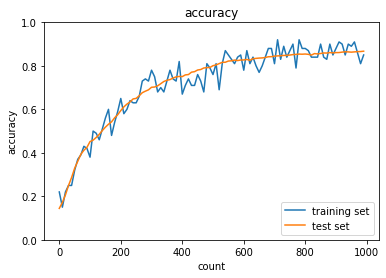

In [16]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================


# network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
#                        use_batchnorm=use_batchnorm)

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

### ハイパーパラメータの調整なしでは学習が進行しない。
- バッチ正規化を有効にする事で学習が進行する。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.22
                : 10. 正答率(テスト) = 0.221
Generation: 20. 正答率(トレーニング) = 0.3
                : 20. 正答率(テスト) = 0.2478
Generation: 30. 正答率(トレーニング) = 0.21
                : 30. 正答率(テスト) = 0.2357
Generation: 40. 正答率(トレーニング) = 0.23
                : 40. 正答率(テスト) = 0.2787
Generation: 50. 正答率(トレーニング) = 0.28
                : 50. 正答率(テスト) = 0.3384
Generation: 60. 正答率(トレーニング) = 0.53
                : 60. 正答率(テスト) = 0.4769
Generation: 70. 正答率(トレーニング) = 0.61
                : 70. 正答率(テスト) = 0.5143
Generation: 80. 正答率(トレーニング) = 0.6
                : 80. 正答率(テスト) = 0.5701
Generation: 90. 正答率(トレーニング) = 0.62
                : 90. 正答率(テスト) = 0.5584
Generation: 100. 正答率(トレーニング) = 0.67
                : 100. 正答率(テスト) = 0.5954
Generation: 110. 正答率(トレーニング) = 0.59
                : 110. 正答率(テスト) = 0.6215
Generation: 120. 正答率(トレーニング) = 0.66
                : 120. 正答率(テスト) = 0.618
Generation: 130. 正答率(トレーニング) = 0.65
                : 130. 正答率(テスト) = 0.6292
Generation:

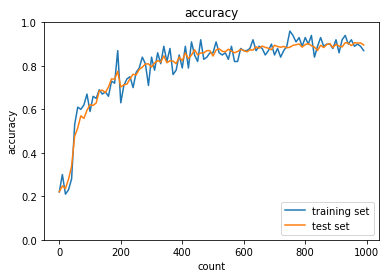

In [13]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

# network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
#                        use_batchnorm=use_batchnorm)

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## MomentumをもとにAdaGradを作ってみよう
θ = 1e-4 とする

### ハイパーパラメータの調整なしでは学習が進行しない。
- バッチ正規化を有効にする事で学習が進行する。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.27
                : 10. 正答率(テスト) = 0.2662
Generation: 20. 正答率(トレーニング) = 0.29
                : 20. 正答率(テスト) = 0.2971
Generation: 30. 正答率(トレーニング) = 0.25
                : 30. 正答率(テスト) = 0.262
Generation: 40. 正答率(トレーニング) = 0.24
                : 40. 正答率(テスト) = 0.3056
Generation: 50. 正答率(トレーニング) = 0.43
                : 50. 正答率(テスト) = 0.3837
Generation: 60. 正答率(トレーニング) = 0.48
                : 60. 正答率(テスト) = 0.4711
Generation: 70. 正答率(トレーニング) = 0.5
                : 70. 正答率(テスト) = 0.4662
Generation: 80. 正答率(トレーニング) = 0.54
                : 80. 正答率(テスト) = 0.514
Generation: 90. 正答率(トレーニング) = 0.54
                : 90. 正答率(テスト) = 0.5346
Generation: 100. 正答率(トレーニング) = 0.68
                : 100. 正答率(テスト) = 0.5862
Generation: 110. 正答率(トレーニング) = 0.64
                : 110. 正答率(テスト) = 0.5662
Generation: 120. 正答率(トレーニング) = 0.65
                : 120. 正答率(テスト) = 0.5997
Generation: 130. 正答率(トレーニング) = 0.64
                : 130. 正答率(テスト) = 0.6012
Generation

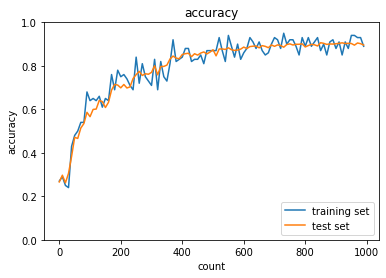

In [12]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

# network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
#                        use_batchnorm=use_batchnorm)

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

### RMSpropは初期値の設定なし、かつバッチ正規化なしでも学習が進行する。
- RMSpropの特徴はハイパーパラメータの調整が必要な場合が少ない事である。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.2213
Generation: 40. 正答率(トレーニング) = 0.24
                : 40. 正答率(テスト) = 0.2131
Generation: 50. 正答率(トレーニング) = 0.24
                : 50. 正答率(テスト) = 0.2085
Generation: 60. 正答率(トレーニング) = 0.34
                : 60. 正答率(テスト) = 0.3266
Generation: 70. 正答率(トレーニング) = 0.45
                : 70. 正答率(テスト) = 0.3706
Generation: 80. 正答率(トレーニング) = 0.37
                : 80. 正答率(テスト) = 0.3845
Generation: 90. 正答率(トレーニング) = 0.39
                : 90. 正答率(テスト) = 0.402
Generation: 100. 正答率(トレーニング) = 0.55
                : 100. 正答率(テスト) = 0.4336
Generation: 110. 正答率(トレーニング) = 0.54
                : 110. 正答率(テスト) = 0.4128
Generation: 120. 正答率(トレーニング) = 0.56
                : 120. 正答率(テスト) = 0.4729
Generation: 130. 正答率(トレーニング) = 0.51
                : 130. 正答率(テスト) = 0.489
Generatio

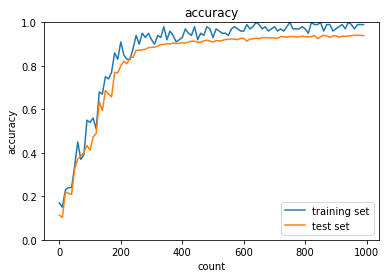

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1603
Generation: 30. 正答率(トレーニング) = 0.28
                : 30. 正答率(テスト) = 0.205
Generation: 40. 正答率(トレーニング) = 0.2
                : 40. 正答率(テスト) = 0.207
Generation: 50. 正答率(トレーニング) = 0.2
                : 50. 正答率(テスト) = 0.2278
Generation: 60. 正答率(トレーニング) = 0.19
                : 60. 正答率(テスト) = 0.2259
Generation: 70. 正答率(トレーニング) = 0.26
                : 70. 正答率(テスト) = 0.2771
Generation: 80. 正答率(トレーニング) = 0.28
                : 80. 正答率(テスト) = 0.3382
Generation: 90. 正答率(トレーニング) = 0.4
                : 90. 正答率(テスト) = 0.3728
Generation: 100. 正答率(トレーニング) = 0.45
                : 100. 正答率(テスト) = 0.389
Generation: 110. 正答率(トレーニング) = 0.4
                : 110. 正答率(テスト) = 0.4168
Generation: 120. 正答率(トレーニング) = 0.57
                : 120. 正答率(テスト) = 0.4392
Generation: 130. 正答率(トレーニング) = 0.44
                : 130. 正答率(テスト) = 0.4978
Generation: 14

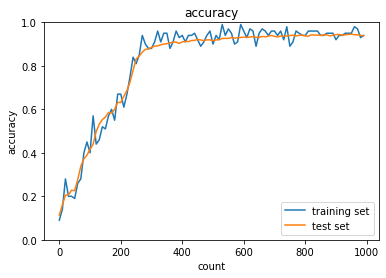

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 学習率を変えてみよう

## [try] 活性化関数と重みの初期化方法を変えてみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

## [try] バッチ正規化をしてみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------